 <div>
<img style="float:left;" src="attachment:consta2.jpg" width="100"/>                                                
</div>
<br>

<h1><center><font size=80 color=#F07167>PREDICTING HEART DISEASE</font></center></h1>

# 1. PROBLEM DEFINITION 
<h1><font color=#00AFB9> Given clinical parameters about a patient, can we predict whether or not they have heart disease?</font></center></h1>

## The following are the features used to predict our target variable (heart disease or no heart disease).

1.	**age** - age in years
2.	**sex** - (1 = male; 0 = female)
3.	**cp** - chest pain type
<ol>0: Typical angina: chest pain related decrease blood supply to the heart</ol>
<ol>1: Atypical angina: chest pain not related to heart</ol>
<ol>2: Non-anginal pain: typically esophageal spasms (non heart related)</ol>
<ol>3: Asymptomatic: chest pain not showing signs of disease</ol>
4.	**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
•	anything above 130-140 is typically cause for concern
5.	**chol** - serum cholestoral in mg/dl
*	serum = LDL + HDL + .2 * triglycerides
*	above 200 is cause for concern
6.	**fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*	'>126' mg/dL signals diabetes
7.	**restecg** - resting electrocardiographic results
<ol>0: Nothing to note</ol>
<ol>1: ST-T Wave abnormality</ol>
	can range from mild symptoms to severe problems	signals non-normal heart beat
<ol>2: Possible or definite left ventricular hypertrophy</ol>
	Enlarged heart's main pumping chamber
8.	**thalach** - maximum heart rate achieved
9.	**exang** - exercise induced angina (1 = yes; 0 = no)
10.	**oldpeak** - ST depression induced by exercise relative to rest
<ol>looks at stress of heart during excercise</ol>
<ol>unhealthy heart will stress more</ol>
11.	**slope** - the slope of the peak exercise ST segment
<ol>0: Upsloping: better heart rate with excercise (uncommon)</ol>
<ol>1: Flatsloping: minimal change (typical healthy heart)</ol>
<ol>2: Downslopins: signs of unhealthy heart</ol>
12.	**ca** - number of major vessels (0-3) colored by flourosopy
<ol>colored vessel means the doctor can see the blood passing through</ol>
<ol>the more blood movement the better (no clots)</ol>
13.	**thal** - thalium stress result
<ol>1,3: normal</ol>
<ol>6: fixed defect: used to be defect but ok now</ol>
<ol>7: reversable defect: no proper blood movement when excercising</ol>
14.	**target** - have disease or not 
<ol>1=yes</ol>
<ol>0=no)</ol>
(= the predicted attribute)


In [7]:
#import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#we want the plots to appear inside the notebook
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
#from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [8]:
#load dataset
df=pd.read_csv("heart-disease.csv")
df.shape #rows,colulns

(303, 14)

# 2. EXPL0RATARY DATA ANALYSIS  

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#check if dataset is balanced or unbalanced
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

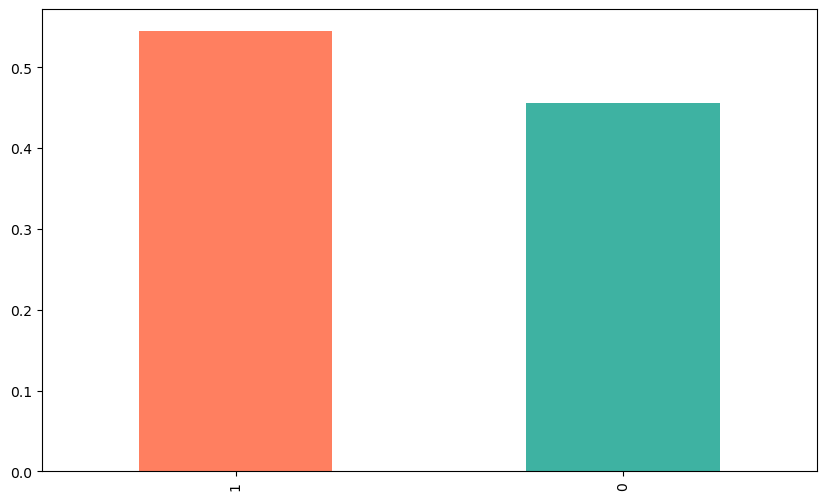

In [11]:
#plot value counts
df.target.value_counts(normalize=True).plot(kind="bar",color=["#FF7F60","#3EB2A2"],figsize=(10,6),);

<Axes: >

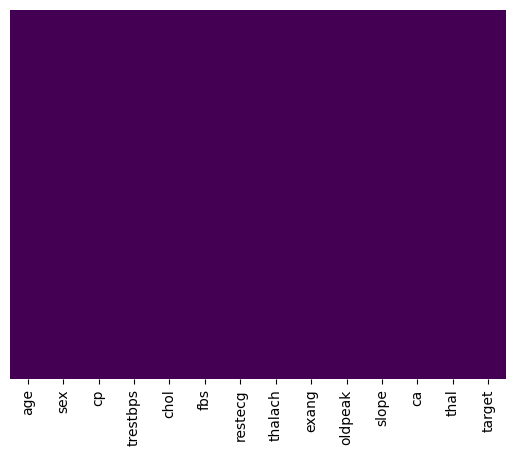

In [12]:
#Check for nulls
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df[df.target==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


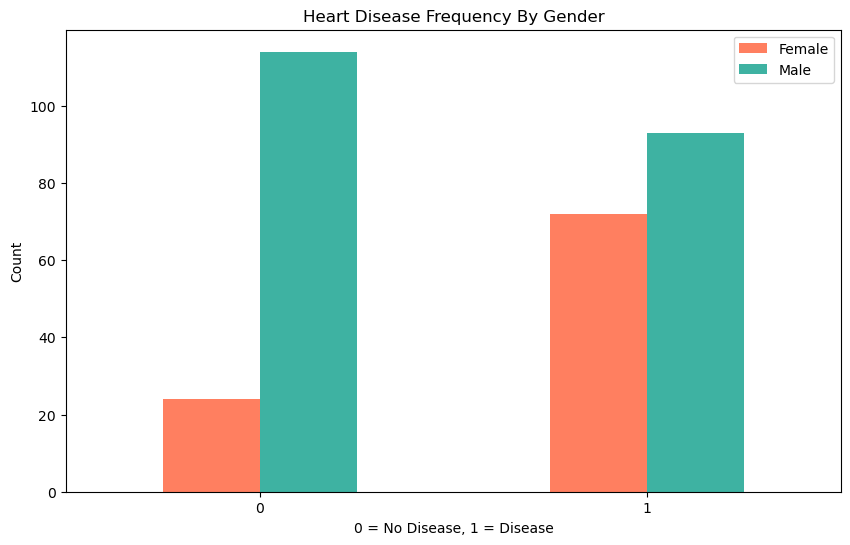

In [14]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=["#FF7F60","#3EB2A2"])
# Add some attributes to it
plt.title("Heart Disease Frequency By Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical
plt.show()

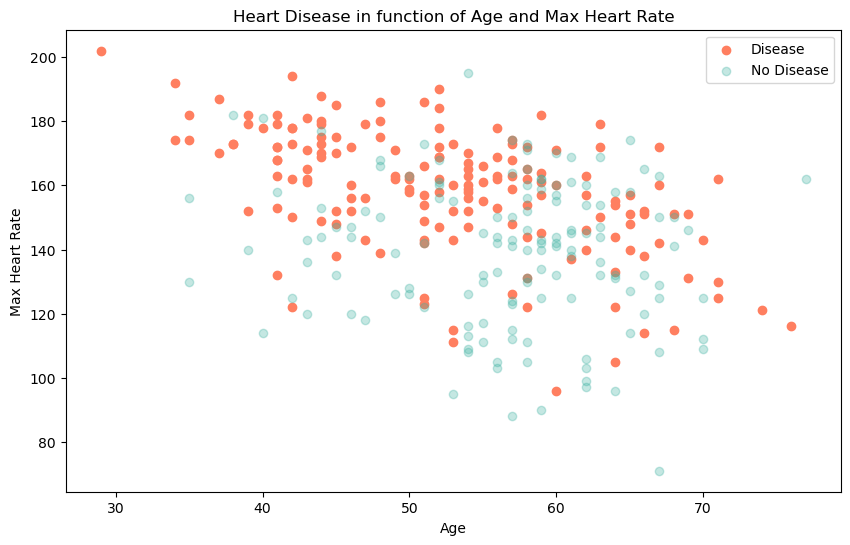

In [15]:
# Create another figure
plt.figure(figsize=(10,6))
# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], alpha=1,
            c="#FF7F60") 
# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], alpha=0.3,
            c="#3EB2A2") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

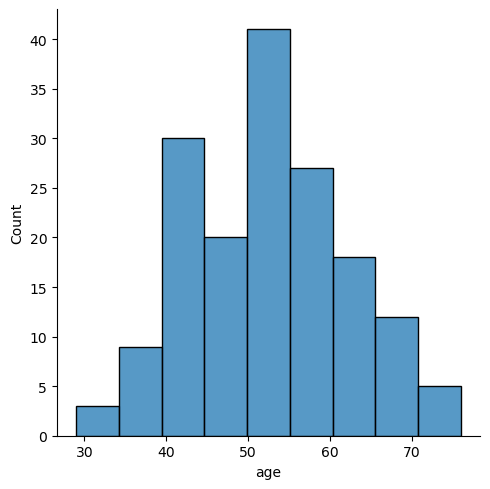

In [16]:
#histogram of age
sns.displot(df[df['target'] == 1]['age'],kde=False)

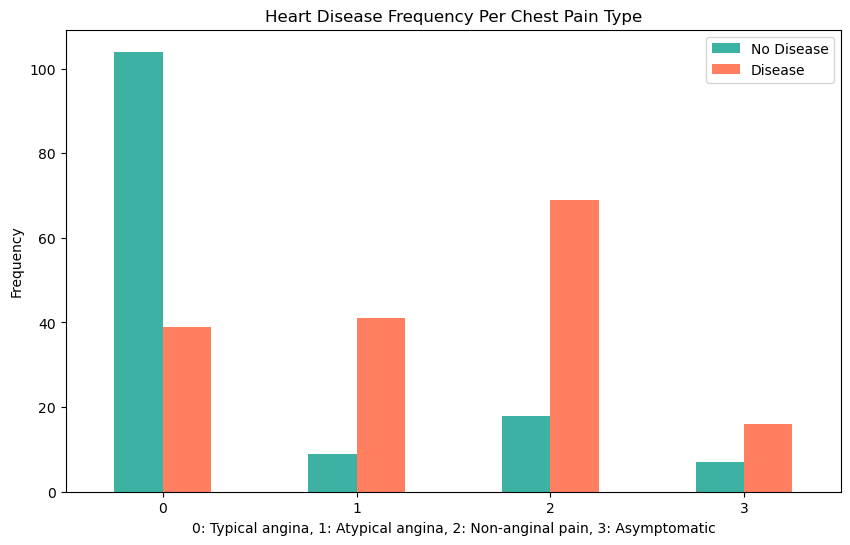

In [17]:
#heart disease per chest pain type
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["#3EB2A2","#FF7F60"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

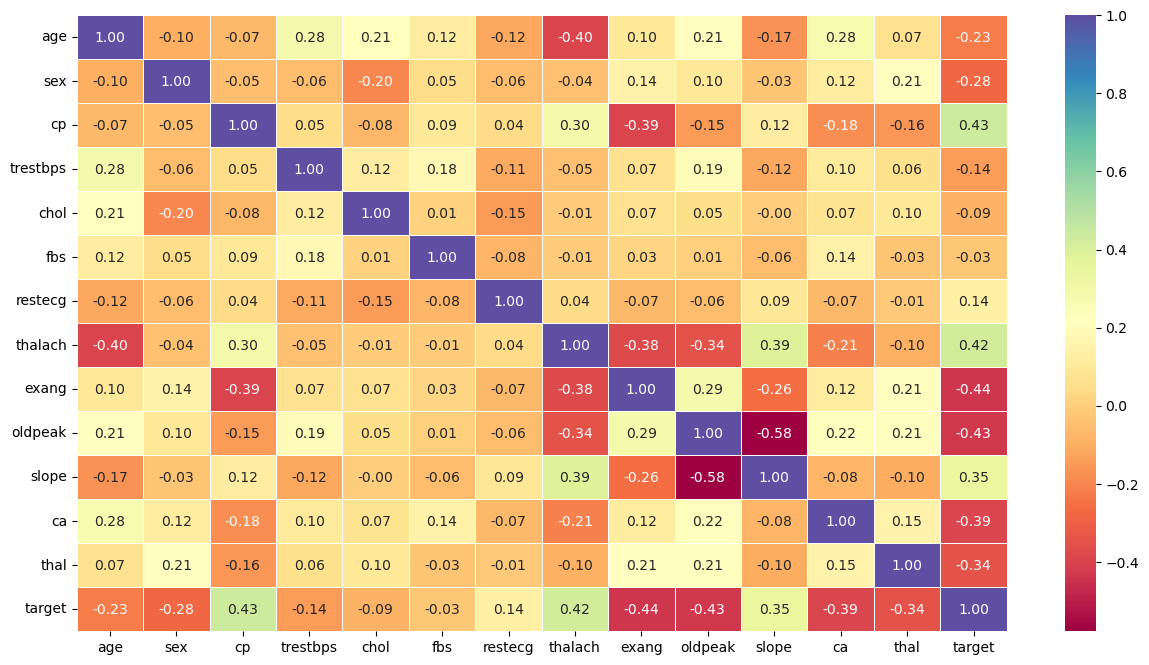

In [18]:
#Correlation Matrix
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="Spectral");  #YlGnBu

# Modelling

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
X= df[['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach','chol',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df.target.values

In [21]:
X.head()

,age,sex,cp,trestbps,restecg,thalach,chol,exang,oldpeak,slope,ca,thal
0,63,1,3,145,0,150,233,0,2.3,0,0,1
1,37,1,2,130,1,187,250,0,3.5,0,0,2
2,41,0,1,130,0,172,204,0,1.4,2,0,2
3,56,1,1,120,1,178,236,0,0.8,2,0,2
4,57,0,0,120,1,163,354,1,0.6,2,0,2


In [22]:
# Random seed for reproducibility
np.random.seed(42)
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [23]:
y_train,len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

In [24]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "XGBoost": XGBClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8688524590163934,
 'XGBoost': 0.8032786885245902,
 'Random Forest': 0.8524590163934426}

# Model Comparison

<Axes: >

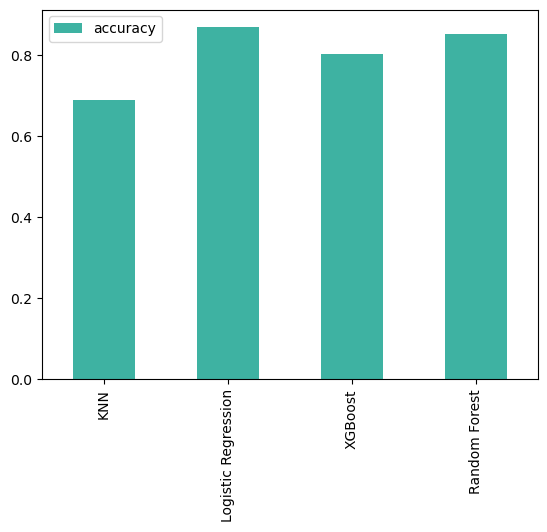

In [26]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(color="#3EB2A2")

# Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [27]:
# Create a list of train scores
train_scores = []
# Create a list of test scores
test_scores = []
# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20
# Setup algorithm
knn = KNeighborsClassifier()
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
      # Fit the algorithm
    knn.fit(X_train, y_train)
        # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
        # Update the test scores
    test_scores.append(knn.score(X_test, y_test))
    

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6652892561983471]

Maximum KNN score on the test data: 75.41%


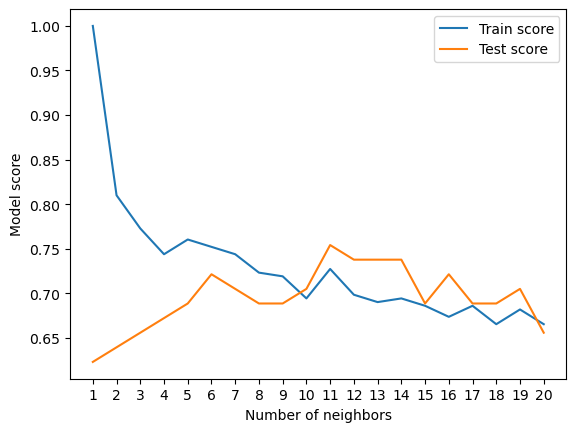

In [29]:
# Plot Scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [30]:
#Tuning models with with RandomizedSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [34]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

# Tuning a model with GridSearchCV

In [37]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [39]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating a classification model, beyond accuracy

In [40]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [41]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

NameError: name 'plot_roc_curve' is not defined

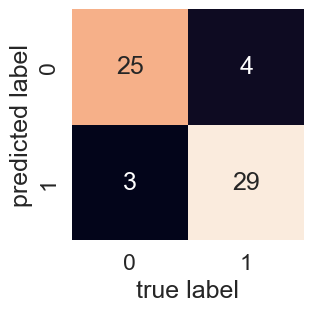

In [42]:
# Display confusion matrix
#print(confusion_matrix(y_test, y_preds))
sns.set(font_scale=1.5) # Increase font size

def plot_confusion_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_confusion_mat(y_test, y_preds)

In [43]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [44]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [45]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
log_reg_model = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [46]:
# Cross-validated accuracy score
cv_acc = cross_val_score(log_reg_model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [47]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [48]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(log_reg_model,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [49]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(log_reg_model,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [50]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(log_reg_model,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

In [51]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.head()

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


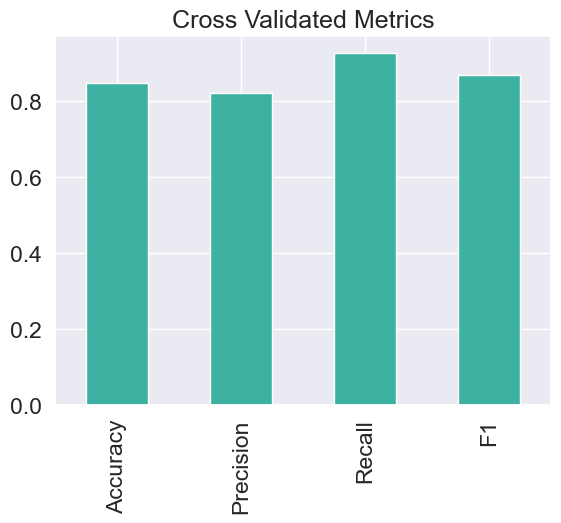

In [52]:
# Visualizing cross-validated metrics
cv_metrics.T.plot.bar(title="Cross Validated Metrics", legend=False,color="#3EB2A2");


Text(0.5, 1.0, 'Cross Validated Scores')

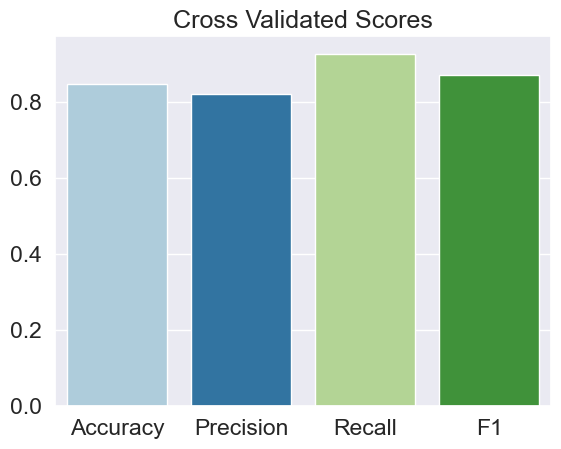

In [53]:
#Visualize
sns.barplot(data=cv_metrics,palette = 'Paired',)
plt.title('Cross Validated Scores')

# Feature importance

In [54]:
# Fit an instance of LogisticRegression (taken from above)
log_reg_model.fit(X_train, y_train);

In [55]:
# Check coef_
log_reg_model.coef_

array([[ 0.0037634 , -0.9018309 ,  0.67868668, -0.01149459,  0.33428517,
         0.02467066, -0.00169354, -0.63044077, -0.57811941,  0.46779482,
        -0.65008509, -0.70114649]])

In [56]:
# Match features to columns
features_dict = dict(zip(df.columns, list(log_reg_model.coef_[0])))
features_dict

{'age': 0.0037634043213308366,
 'sex': -0.9018308995911695,
 'cp': 0.6786866835046638,
 'trestbps': -0.011494589572692365,
 'chol': 0.3342851661330845,
 'fbs': 0.024670662435932873,
 'restecg': -0.0016935437825392353,
 'thalach': -0.6304407659986964,
 'exang': -0.5781194104449724,
 'oldpeak': 0.4677948221231074,
 'slope': -0.6500850907966303,
 'ca': -0.7011464884946798}

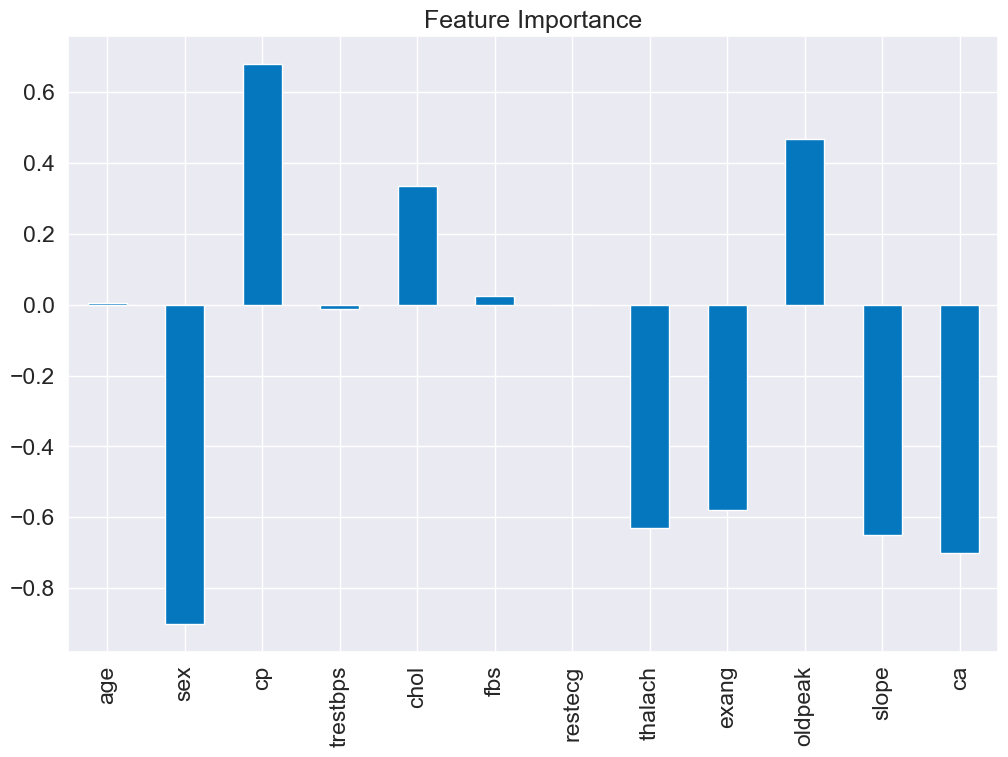

In [57]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False,color="#0477BF",figsize=(12,8));

In [58]:
 #Joblib
from joblib import dump,load
#save to file
dump(log_reg_model,filename="Logistic_Regression_Heart_Disease_Model2.joblib")

['Logistic_Regression_Heart_Disease_Model2.joblib']